In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

Fashion dataset for predicting fashion categories
The classes are:

Label	Description  
0	T-shirt/top  
1	Trouser  
2	Pullover  
3	Dress  
4	Coat  
5	Sandal  
6	Shirt  
7	Sneaker  
8	Bag  
9	Ankle boot  

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

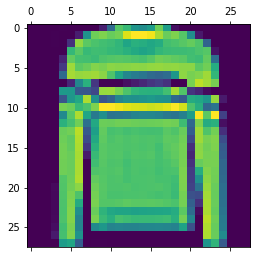

In [7]:
plt.matshow(X_train[5])

In [8]:
y_train[1]

0

In [9]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

### Flatten dataset

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train = X_train/255
X_test = X_test/255

Dividing by 255 scales the arrays for more accuracy in the model. We use 255 as that is the maximum RGB value.

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

In [14]:
X_test.shape

(10000, 28, 28)

In [15]:
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [16]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 990us/step - loss: 0.5980 - accuracy: 0.7979
Epoch 2/10
1875/1875 [==============================] - 1s 492us/step - loss: 0.4609 - accuracy: 0.8425
Epoch 3/10
1875/1875 [==============================] - 1s 493us/step - loss: 0.4364 - accuracy: 0.8503
Epoch 4/10
1875/1875 [==============================] - 1s 473us/step - loss: 0.4231 - accuracy: 0.8541
Epoch 5/10
1875/1875 [==============================] - 1s 442us/step - loss: 0.4133 - accuracy: 0.8574
Epoch 6/10
1875/1875 [==============================] - 1s 468us/step - loss: 0.4070 - accuracy: 0.8595
Epoch 7/10
1875/1875 [==============================] - 1s 495us/step - loss: 0.4024 - accuracy: 0.8610
Epoch 8/10
1875/1875 [==============================] - 1s 470us/step - loss: 0.3985 - accuracy: 0.8610
Epoch 9/10
1875/1875 [==============================] - 1s 472us/step - loss: 0.3940 - accuracy: 0.8626
Epoch 10/10
1875/1875 [==============================] - 1s 453u

Approximately 86.4% accuracy after 10 iterations.

In [17]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 381us/step - loss: 0.4556 - accuracy: 0.8425


[0.45559999346733093, 0.8424999713897705]

In [18]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.4291873e-04, 1.8825474e-05, 1.2088418e-02, 2.9436946e-03,
       5.0359666e-03, 9.8596084e-01, 2.2016227e-02, 9.8130667e-01,
       7.8574604e-01, 9.9846923e-01], dtype=float32)

In [19]:
np.argmax(y_predicted[1])

2

In [20]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[9, 2, 1, 1, 6]

In [21]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[799,   2,  32,  53,   6,   0,  96,   0,  12,   0],
       [  3, 955,   6,  27,   5,   0,   2,   0,   2,   0],
       [ 15,   6, 835,  11,  92,   1,  38,   0,   2,   0],
       [ 19,  11,  30, 868,  40,   0,  26,   1,   5,   0],
       [  0,   0, 191,  27, 734,   0,  44,   0,   4,   0],
       [  0,   0,   0,   1,   0, 909,   0,  64,   2,  24],
       [123,   2, 207,  43, 123,   0, 485,   0,  17,   0],
       [  0,   0,   0,   0,   0,  22,   0, 955,   0,  23],
       [  4,   1,  14,   9,   3,   4,  16,   5, 944,   0],
       [  0,   0,   0,   0,   0,  11,   1,  47,   0, 941]])>

As shown by the confusion matrix, accuracy for most fashion categories are acceptable, however it appears quite low for the 7th label, shirt.

In [25]:
model = keras.Sequential([
    keras.layers.Dense(200, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 538us/step - loss: 0.4852 - accuracy: 0.8286
Epoch 2/10
1875/1875 [==============================] - 1s 548us/step - loss: 0.3674 - accuracy: 0.8666
Epoch 3/10
1875/1875 [==============================] - 1s 536us/step - loss: 0.3306 - accuracy: 0.8796
Epoch 4/10
1875/1875 [==============================] - 1s 544us/step - loss: 0.3078 - accuracy: 0.8868
Epoch 5/10
1875/1875 [==============================] - 1s 545us/step - loss: 0.2881 - accuracy: 0.8930
Epoch 6/10
1875/1875 [==============================] - 1s 540us/step - loss: 0.2738 - accuracy: 0.8978
Epoch 7/10
1875/1875 [==============================] - 1s 535us/step - loss: 0.2619 - accuracy: 0.9018
Epoch 8/10
1875/1875 [==============================] - 1s 536us/step - loss: 0.2494 - accuracy: 0.9064
Epoch 9/10
1875/1875 [==============================] - 1s 540us/step - loss: 0.2408 - accuracy: 0.9098
Epoch 10/10
1875/1875 [==============================] - 1s 536u

Adding a hidden layer has increased the accuracy of the model to approximately 91.4% after 10 iterations

In [26]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 420us/step - loss: 0.3722 - accuracy: 0.8728


[0.3721693754196167, 0.8727999925613403]

Before adding a hidden layer, accuracy was 86.4%, after adding a hidden layer it increased to 87.3%